# Choosing train, test and validation datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

total_per_scene = pd.read_csv("../../proportions_fixed.csv")
total_per_scene.head()

,type,scene
0,255,2013_05_28_drive_0004_sync
1,0,2013_05_28_drive_0004_sync
2,1,2013_05_28_drive_0004_sync
3,255,2013_05_28_drive_0004_sync
4,2,2013_05_28_drive_0004_sync


In [8]:
from collections import namedtuple

#--------------------------------------------------------------------------------
# Definitions
#--------------------------------------------------------------------------------

# a label and all meta information
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'kittiId'     , # An integer ID that is associated with this label for KITTI-360
                    # NOT FOR RELEASING

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )


#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

# Please adapt the train IDs as appropriate for your approach.
# Note that you might want to ignore labels with ID 255 during training.
# Further note that the current train IDs are only a suggestion. You can use whatever you like.
# Make sure to provide your results using the original IDs and not the training IDs.
# Note that many IDs are ignored in evaluation and thus you never need to predict these!

labels = [
    #       name                     id    kittiId,    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,       -1 ,       255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,       -1 ,       255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,       -1 ,       255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,       -1 ,       255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,       -1 ,       255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,       -1 ,       255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,       -1 ,       255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        1 ,         0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        3 ,         1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,        2 ,       255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,        10,       255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        11,         2 , 'construction'    , 2       , True         , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        7 ,         3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        8 ,         4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,        30,       255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,        31,       255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,        32,       255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        21,         5 , 'object'          , 3       , True         , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,       -1 ,       255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        23,         6 , 'object'          , 3       , True         , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        24,         7 , 'object'          , 3       , True         , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        5 ,         8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        4 ,         9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,        9 ,        10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,        19,        11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,        20,        12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,        13,        13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,        14,        14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,        34,        15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,        16,       255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,        15,       255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,        33,        16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,        17,        17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,        18,        18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'garage'               , 34 ,        12,         2 , 'construction'    , 2       , True         , False        , ( 64,128,128) ),
    Label(  'gate'                 , 35 ,        6 ,         4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'stop'                 , 36 ,        29,       255 , 'construction'    , 2       , True         , True         , (150,120, 90) ),
    Label(  'smallpole'            , 37 ,        22,         5 , 'object'          , 3       , True         , False        , (153,153,153) ),
    Label(  'lamp'                 , 38 ,        25,       255 , 'object'          , 3       , True         , False        , (0,   64, 64) ),
    Label(  'trash bin'            , 39 ,        26,       255 , 'object'          , 3       , True         , False        , (0,  128,192) ),
    Label(  'vending machine'      , 40 ,        27,       255 , 'object'          , 3       , True         , False        , (128, 64,  0) ),
    Label(  'box'                  , 41 ,        28,       255 , 'object'          , 3       , True         , False        , (64,  64,128) ),
    Label(  'unknown construction' , 42 ,        35,       255 , 'void'            , 0       , False        , True         , (102,  0,  0) ),
    Label(  'unknown vehicle'      , 43 ,        36,       255 , 'void'            , 0       , False        , True         , ( 51,  0, 51) ),
    Label(  'unknown object'       , 44 ,        37,       255 , 'void'            , 0       , False        , True         , ( 32, 32, 32) ),
    Label(  'license plate'        , -1 ,        -1,        -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]

kittiId2label   = { label.id : label for label in labels           }
trainId2label   = { label.trainId : label for label in reversed(labels) }

def convert_id_to_training_id(id):
  return kittiId2label[id].trainId

def convert_training_id_to_id(id):
  return trainId2label[id].kittiId

In [9]:
trainId2label

{-1: Label(name='license plate', id=-1, kittiId=-1, trainId=-1, category='vehicle', categoryId=7, hasInstances=False, ignoreInEval=True, color=(0, 0, 142)),
 255: Label(name='unlabeled', id=0, kittiId=-1, trainId=255, category='void', categoryId=0, hasInstances=False, ignoreInEval=True, color=(0, 0, 0)),
 5: Label(name='pole', id=17, kittiId=21, trainId=5, category='object', categoryId=3, hasInstances=True, ignoreInEval=False, color=(153, 153, 153)),
 4: Label(name='fence', id=13, kittiId=8, trainId=4, category='construction', categoryId=2, hasInstances=False, ignoreInEval=False, color=(190, 153, 153)),
 2: Label(name='building', id=11, kittiId=11, trainId=2, category='construction', categoryId=2, hasInstances=True, ignoreInEval=False, color=(70, 70, 70)),
 18: Label(name='bicycle', id=33, kittiId=18, trainId=18, category='vehicle', categoryId=7, hasInstances=True, ignoreInEval=False, color=(119, 11, 32)),
 17: Label(name='motorcycle', id=32, kittiId=17, trainId=17, category='vehicle',

In [10]:
labels = [trainId2label[i].name for i in range(0,19)]
labels.append(trainId2label[255].name)
labels

['road',
 'sidewalk',
 'building',
 'wall',
 'fence',
 'pole',
 'traffic light',
 'traffic sign',
 'vegetation',
 'terrain',
 'sky',
 'person',
 'rider',
 'car',
 'truck',
 'bus',
 'train',
 'motorcycle',
 'bicycle',
 'unlabeled']

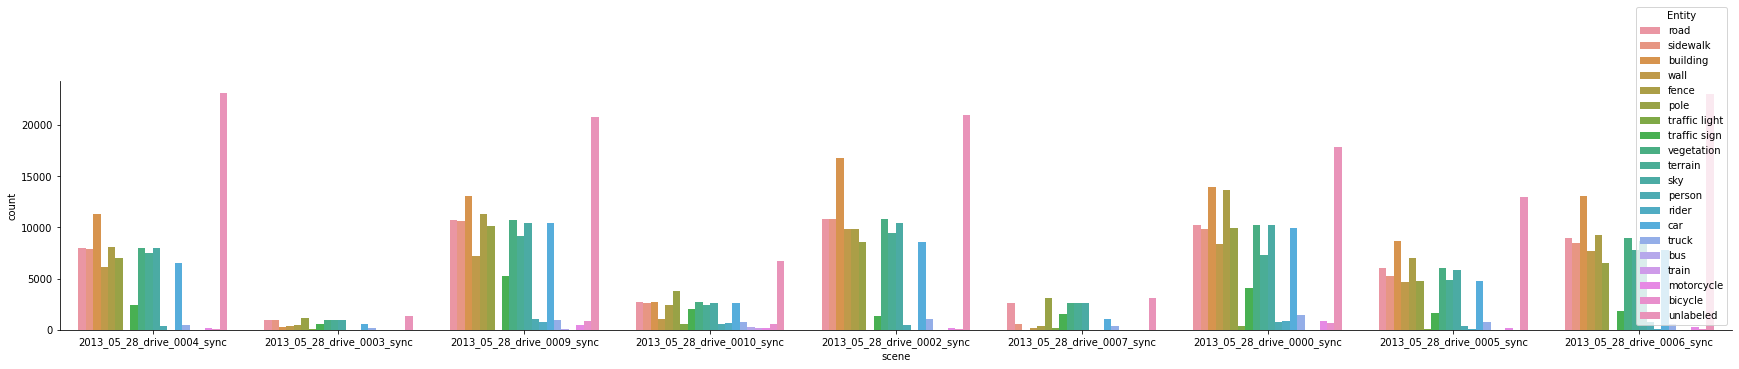

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(x="scene", hue="type",
                data=total_per_scene, kind="count",
                height=4, aspect=50/8.27)
g._legend.remove()
plt.legend(title='Entity', loc='best', labels=labels)
plt.show(g)

In [12]:
total_per_scene.scene.unique()

array(['2013_05_28_drive_0004_sync', '2013_05_28_drive_0003_sync',
       '2013_05_28_drive_0009_sync', '2013_05_28_drive_0010_sync',
       '2013_05_28_drive_0002_sync', '2013_05_28_drive_0007_sync',
       '2013_05_28_drive_0000_sync', '2013_05_28_drive_0005_sync',
       '2013_05_28_drive_0006_sync'], dtype=object)

In [26]:
def return_count_per_scene(scene):
  t = total_per_scene[total_per_scene['scene'] == scene].value_counts(sort=False)
  a1 = t.to_dict()
  a2 = []
  ids = list(range(0,19))
  ids.append(255)  #unlabeled id

  for i in ids:
    k = (i,scene)
    if k in a1.keys():
      a2.append(a1.get(k))
    else:
      a2.append(0)
    

  return a2

In [24]:
import matplotlib

norm = matplotlib.colors.Normalize(vmin=0, vmax=21)

cmap = matplotlib.cm.get_cmap('rainbow')
colors = [cmap(norm(i)) for i in range(0,20)]
print(colors)

[(0.5, 0.0, 1.0, 1.0), (0.40588235294117647, 0.1473016980546375, 0.997269173385788, 1.0), (0.31176470588235294, 0.2913897468893246, 0.989091608371146, 1.0), (0.21764705882352942, 0.42912060877260894, 0.9755119679804366, 1.0), (0.12352941176470589, 0.5574894393428855, 0.9566044195004408, 1.0), (0.02941176470588236, 0.6736956436465572, 0.9324722294043558, 1.0), (0.0725490196078431, 0.7829276104921027, 0.9005867023006374, 1.0), (0.16666666666666663, 0.8660254037844386, 0.8660254037844387, 1.0), (0.26078431372549016, 0.9302293085467402, 0.8267341748257635, 1.0), (0.3549019607843137, 0.9741386021045101, 0.7829276104921028, 1.0), (0.4490196078431372, 0.9967953249171991, 0.7348449670469758, 1.0), (0.5509803921568628, 0.9967953249171991, 0.678235117349234, 1.0), (0.6450980392156862, 0.9741386021045102, 0.622112816721474, 1.0), (0.7392156862745098, 0.9302293085467404, 0.5625927516198231, 1.0), (0.8333333333333333, 0.8660254037844387, 0.5000000000000001, 1.0), (0.9274509803921569, 0.782927610492

Text(0.5, 1.0, 'Scene 10')

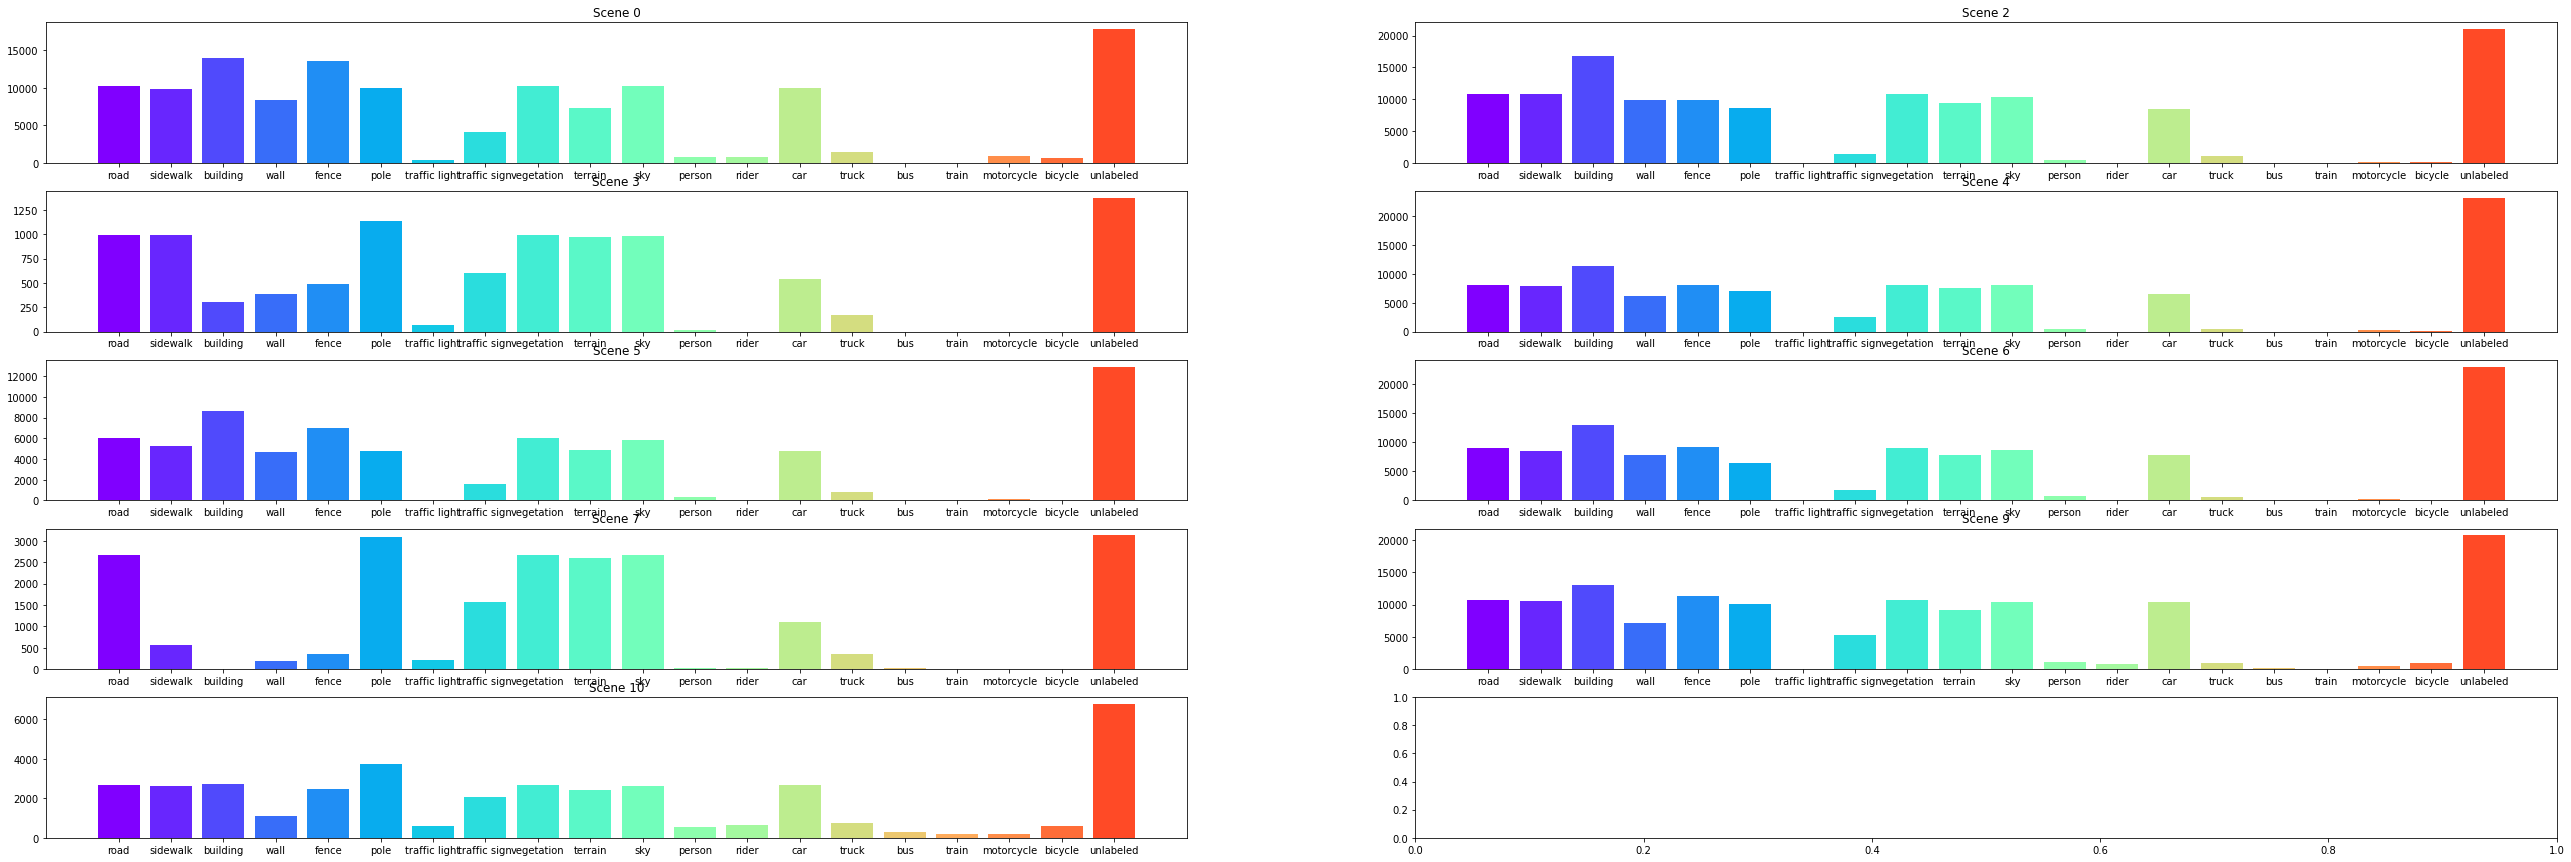

In [27]:
fig, axs = plt.subplots(5, 2, figsize=(45,15))


axs[0, 0].bar(labels, return_count_per_scene('2013_05_28_drive_0000_sync'), color=colors)
axs[0, 0].set_title('Scene 0')
axs[0, 1].bar(labels, return_count_per_scene('2013_05_28_drive_0002_sync'), color=colors)
axs[0, 1].set_title('Scene 2')
axs[1, 0].bar(labels, return_count_per_scene('2013_05_28_drive_0003_sync'), color=colors)
axs[1, 0].set_title('Scene 3')
axs[1, 1].bar(labels, return_count_per_scene('2013_05_28_drive_0004_sync'), color=colors)
axs[1, 1].set_title('Scene 4')
axs[2, 0].bar(labels, return_count_per_scene('2013_05_28_drive_0005_sync'), color=colors)
axs[2, 0].set_title('Scene 5')
axs[2, 1].bar(labels, return_count_per_scene('2013_05_28_drive_0006_sync'), color=colors)
axs[2, 1].set_title('Scene 6')
axs[3, 0].bar(labels, return_count_per_scene('2013_05_28_drive_0007_sync'), color=colors)
axs[3, 0].set_title('Scene 7')
axs[3, 1].bar(labels, return_count_per_scene('2013_05_28_drive_0009_sync'), color=colors)
axs[3, 1].set_title('Scene 9')
axs[4, 0].bar(labels, return_count_per_scene('2013_05_28_drive_0010_sync'), color=colors)
axs[4, 0].set_title('Scene 10')

Text(0.5, 1.0, 'Scene 10')

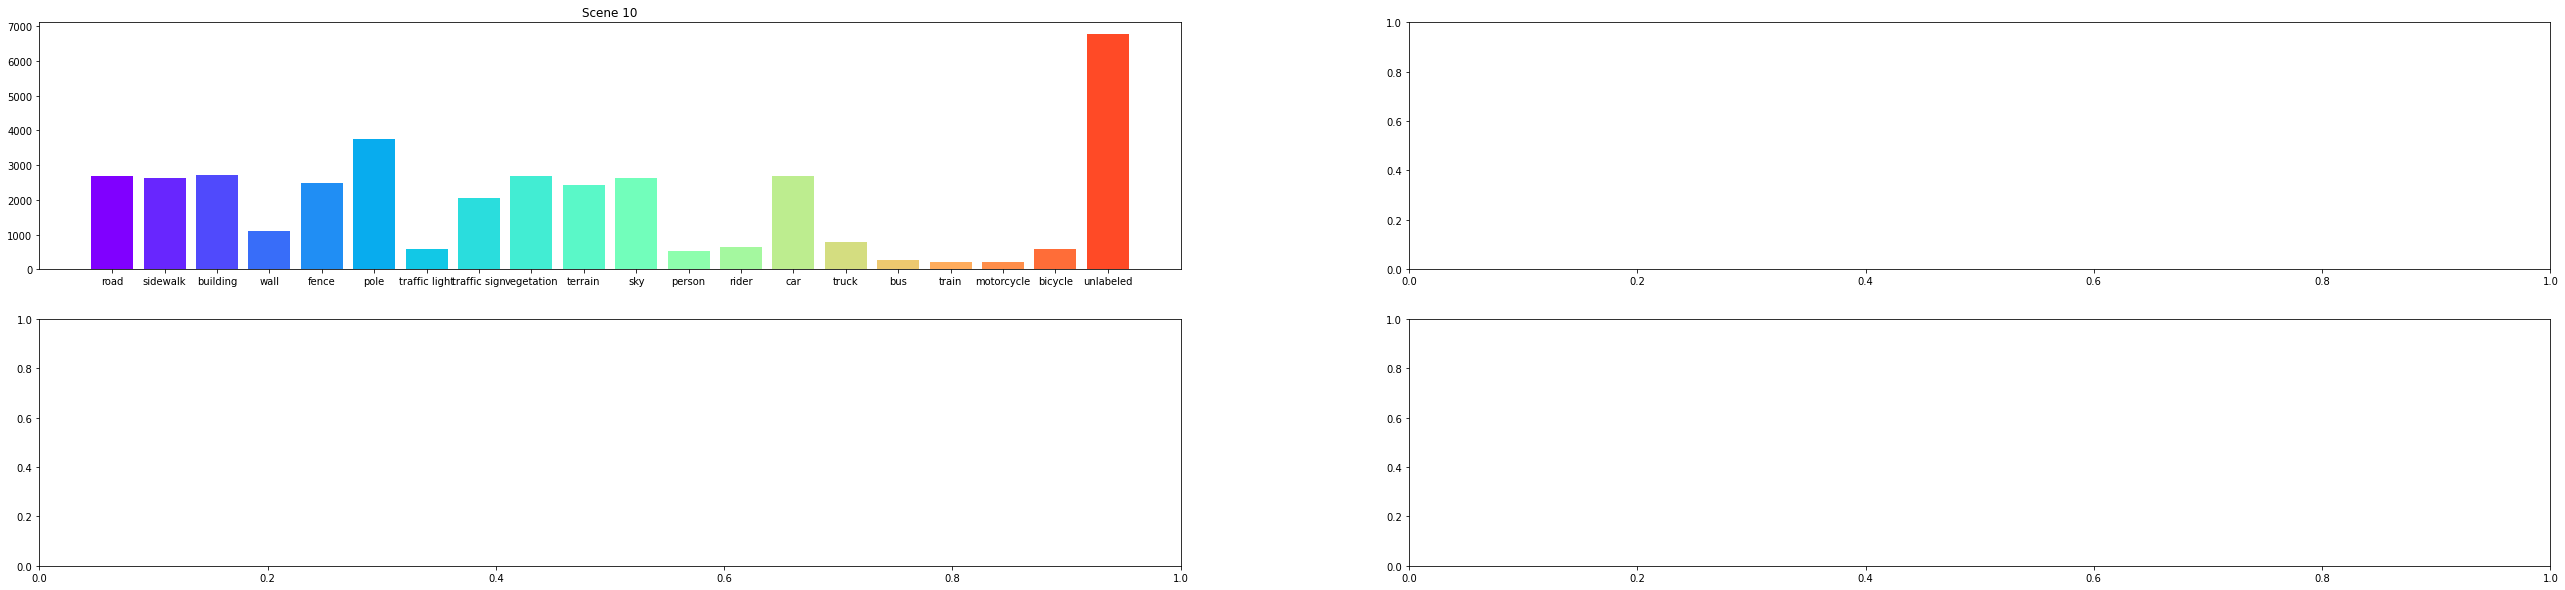

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(45,10))

axs[0, 0].bar(labels, return_count_per_scene('2013_05_28_drive_0010_sync'), color=colors)
axs[0, 0].set_title('Scene 10')

Training:
* Scenes 0, 2, 6, 9, 10

Validation:
* Scenes 5, 7

Testing:
* Scenes 3, 4